# 🏃‍♂️ Ultra Marathon Data Analysis  

The dataset used in this analysis is from Kaggle and can be found at:  
[The Big Dataset of Ultra Marathon Running](https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running?resource=download).  

This notebook explores trends, statistics, and insights from ultra marathon running data.  

## 📌 What We Will Explore:  
✅ **Trends in athlete performance** over different distances.  
✅ **Distribution of finish times and speeds** across races.  
✅ **Impact of age and gender** on performance.  


-----


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('dataset\TWO_CENTURIES_OF_UM_RACES.csv')
data.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\moham\AppData\Local\Temp\ipykernel_12092\134543405.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv('dataset\TWO_CENTURIES_OF_UM_RACES.csv')
C:\Users\moham\AppData\Local\Temp\ipykernel_12092\134543405.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset\TWO_CENTURIES_OF_UM_RACES.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [122]:
data.shape

(7461195, 13)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


----

## Data Cleaning & Preprocessing : USA Ultra Marathons 2022

- First we will remove NaNs and duplicated rows

In [124]:
data.isna().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [125]:
data = data.dropna()
data = data.drop_duplicates()

### Filtering Criteria
We'll focus on analyzing races that meet these specific conditions:
- Distance: 50km or 50 miles
- Location: United States events only
- Year: Latest -> 2022 races


> *50km or 50 miles, These are two of the most popular ultra marathon distances in the United States.*



#### Distance Filtering
we'll isolate events that are either 50km or 50 miles in length and only for USA in 2022. This helps us:
- Compare similar race formats
- Ensure consistent distance measurements
- Enable meaningful performance comparisons

In [126]:
#count the number of athletes in each event distance

event_counts = data['Event distance/length'].value_counts()
event_counts.sort_values(ascending=False).head(5)

Event distance/length
50km     909454
100km    563338
50mi     252754
87km     178866
56km     166862
Name: count, dtype: int64

In [127]:
data[data['Year of event']==2022].count()

Year of event                269729
Event dates                  269729
Event name                   269729
Event distance/length        269729
Event number of finishers    269729
Athlete performance          269729
Athlete club                 269729
Athlete country              269729
Athlete year of birth        269729
Athlete gender               269729
Athlete age category         269729
Athlete average speed        269729
Athlete ID                   269729
dtype: int64

In [128]:
#filtering data to only 50k and 50mi and year is 2022

df = data[((data['Event distance/length']=='50km') | (data['Event distance/length']=='50mi')) & (data['Year of event']==2022)]
df.shape

(70469, 13)

In [129]:
#verifying filtered data

#year of event
print(f'\nlatest year: {df['Year of event'].unique()}')

print("-"*30)

#event distance count
event_counts = df['Event distance/length'].value_counts()
event_counts.sort_values(ascending=False).head(20)


latest year: [2022]
------------------------------


Event distance/length
50km    54705
50mi    15764
Name: count, dtype: int64

In [130]:
# filter events containing "USA"
#usa_events = df[df['Event name'].str.split().str[-1] == '(USA)']
usa_events = df[df['Event name'].str.contains('USA', na=False)]

usa_events.sample(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
3526911,2022,17.09.2022,Tava's Shadow Ultra 50km (USA),50km,13,7:39:14 h,"*Colorado Springs, CO",USA,1999.0,M,MU23,6.533,1027098
3513950,2022,24.09.2022,The Cascade Super 50mi Ultra Race (USA),50mi,95,11:27:32 h,"*Yakima, WA",USA,1980.0,F,W40,7.022,928081
3563890,2022,19.11.2022,Dead Horse 50 km Race (USA),50km,347,4:10:53 h,"*Denver, CO",USA,1989.0,M,M23,11.958,969010


In [131]:
# filter df containing "USA"
df = df[df['Event name'].str.split().str[-1] == '(USA)']
df.shape

(49731, 13)

----

#### Creating a New Age Column 

In [132]:
df['Athlete age'] = 2022 - df['Athlete year of birth'].astype(int)

In [135]:
#checking if there are outliers in age column
df['Athlete age'].describe()

count    49731.000000
mean        41.509240
std         10.852193
min         10.000000
25%         33.000000
50%         41.000000
75%         49.000000
max         87.000000
Name: Athlete age, dtype: float64

#### creating a new column from the athlete_performance (hh:mm:ss) to total hours and round to 2 decimal places

In [136]:
# athlete_performance (hh:mm:ss) to total hours and round to 2 decimal places
df["athlete_performance_in_hours"] = (pd.to_timedelta(df["Athlete performance"]).dt.total_seconds() / 3600).round(2)


#### Cleaning Athlete Performance Data, and Event Names
- Removed the **"H" (hours)** from the **Athlete Performance** column to keep only the time value.  
- Removed country names **"(USA)"** from the **Event Name** column since we filtered the data for USA only.

In [137]:
#removing H from the athlete performance
df['Athlete performance'] = df['Athlete performance'].str.split().str[0]

#removing (USA) from the Event name
df['Event name'] = df['Event name'].str.split().str[:-1].str.join(' ')
df.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age,athlete_performance_in_hours
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,"*Boston, MA",USA,1994.0,M,M23,10.194,839364,28,7.89
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,"*Charlotte, NC",USA,1990.0,M,M23,9.765,366598,32,8.24
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,"*Kannapolis, NC",USA,1979.0,M,M40,9.67,553476,43,8.32


####  Dropping Unnecessary Columns  

In [ ]:
#dropping columns ['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category']

df.drop(columns= ['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], inplace=True)
df.sample(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age,athlete_performance_in_hours
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,M,10.194,839364,28,7.89
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,M,9.765,366598,32,8.24
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,M,9.67,553476,43,8.32
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,M,9.583,807555,28,8.40
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,M,9.256,947348,25,8.69


------

In [139]:
df.reset_index(drop=True, inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49731 entries, 0 to 49730
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year of event                 49731 non-null  int64  
 1   Event dates                   49731 non-null  object 
 2   Event name                    49731 non-null  object 
 3   Event distance/length         49731 non-null  object 
 4   Event number of finishers     49731 non-null  int64  
 5   Athlete performance           49731 non-null  object 
 6   Athlete gender                49731 non-null  object 
 7   Athlete average speed         49731 non-null  object 
 8   Athlete ID                    49731 non-null  int64  
 9   Athlete age                   49731 non-null  int32  
 10  athlete_performance_in_hours  49731 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(6)
memory usage: 4.0+ MB


In [141]:
#converting Event dates to date format

#bad data in Event dates column 
df[df['Event dates'].str.contains('-')]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age,athlete_performance_in_hours
1977,2022,26.-27.02.2022,Flat Top Mesa 50 km Endurance Run,50km,14,5:16:35,M,9.476,832970,32,5.28
1978,2022,26.-27.02.2022,Flat Top Mesa 50 km Endurance Run,50km,14,5:57:37,M,8.389,343840,43,5.96
1979,2022,26.-27.02.2022,Flat Top Mesa 50 km Endurance Run,50km,14,6:06:26,M,8.187,179317,49,6.11
1980,2022,26.-27.02.2022,Flat Top Mesa 50 km Endurance Run,50km,14,6:11:06,F,8.084,191666,37,6.18
1981,2022,26.-27.02.2022,Flat Top Mesa 50 km Endurance Run,50km,14,7:09:35,M,6.984,236400,42,7.16
...,...,...,...,...,...,...,...,...,...,...,...
46292,2022,06.-07.11.2022,Valley of Fire Backcountry（Fire Fest Ultra）,50mi,22,14:41:16,F,5.479,840934,51,14.69
46293,2022,06.-07.11.2022,Valley of Fire Backcountry（Fire Fest Ultra）,50mi,22,15:18:48,M,5.255,944208,34,15.31
46294,2022,06.-07.11.2022,Valley of Fire Backcountry（Fire Fest Ultra）,50mi,22,15:33:30,M,5.172,795309,50,15.56
46295,2022,06.-07.11.2022,Valley of Fire Backcountry（Fire Fest Ultra）,50mi,22,16:17:57,M,4.937,348736,41,16.30


In [142]:
#removing minus sign from the Event dates 
df['Event dates'] = df['Event dates'].str.split('-').str[-1]

df['Event dates'] = pd.to_datetime(df['Event dates'], format='%d.%m.%Y')
df.dtypes, df.shape

(Year of event                            int64
 Event dates                     datetime64[ns]
 Event name                              object
 Event distance/length                   object
 Event number of finishers                int64
 Athlete performance                     object
 Athlete gender                          object
 Athlete average speed                   object
 Athlete ID                               int64
 Athlete age                              int32
 athlete_performance_in_hours           float64
 dtype: object,
 (49731, 11))

In [143]:
#renaming columns
df.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete gender',
       'Athlete average speed', 'Athlete ID', 'Athlete age',
       'athlete_performance_in_hours'],
      dtype='object')

In [144]:
# convert column names to lowercase and replace spaces with underscores

df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

df = df.rename(columns={'event_distance/length': 'event_distance'})
df.columns.tolist()

['year_of_event',
 'event_dates',
 'event_name',
 'event_distance',
 'event_number_of_finishers',
 'athlete_performance',
 'athlete_gender',
 'athlete_average_speed',
 'athlete_id',
 'athlete_age',
 'athlete_performance_in_hours']

In [145]:
# Convert speed to numeric, handling any errors
df['athlete_average_speed'] = pd.to_numeric(df['athlete_average_speed'], errors='coerce')

--------
--------

## Statistical Analysis  

We will perform some fundamental statistical analysis to understand the filtered dataset better:  

- Summary statistics for key numerical columns (finish time, age, speed).  
- Distribution analysis using histograms.  
- Comparison of performance based on gender.  
- Correlation analysis between age, speed, and race distance.  


In [146]:
df.sample(3)

,year_of_event,event_dates,event_name,event_distance,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,athlete_performance_in_hours
24353,2022,2022-06-25,Night Hawk 50K,50km,52,9:32:01,M,5.245,249471,41,9.53
23145,2022,2022-07-09,Leadville Silver Rush 50 Mile Run,50mi,388,8:10:56,M,9.834,179774,39,8.18
22092,2022,2022-07-16,Wy'east Howl 50km Race,50km,185,6:30:02,F,7.692,982279,30,6.50


In [147]:
# summary statistics for performance (minutes), speed, and age
round(df[["athlete_performance_in_hours", "athlete_average_speed", "athlete_age"]].describe(), 2)

,athlete_performance_in_hours,athlete_average_speed,athlete_age
count,49731.00,49731.00,49731.00
mean,8.38,7.25,41.51
std,2.78,1.64,10.85
min,2.92,1.56,10.00
25%,6.39,6.14,33.00
50%,7.68,7.02,41.00
75%,9.85,8.15,49.00
max,37.42,23.35,87.00


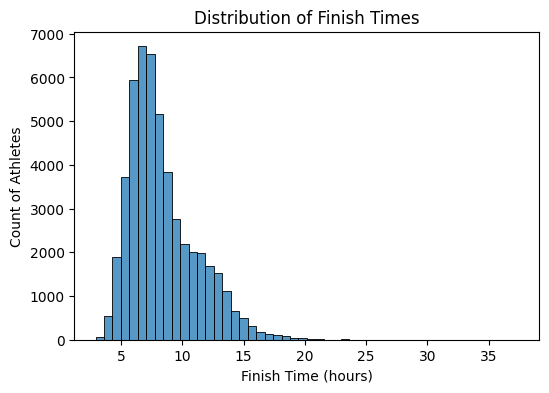

In [148]:
plt.figure(figsize=(6, 4))
sns.histplot(df["athlete_performance_in_hours"], bins=50)
plt.xlabel("Finish Time (hours)")
plt.ylabel("Count of Athletes")
plt.title("Distribution of Finish Times")
plt.show()

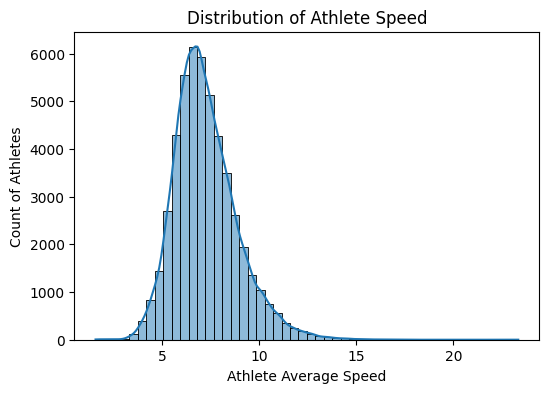

In [149]:
plt.figure(figsize=(6, 4))
sns.histplot(df["athlete_average_speed"], bins=50, kde=True)
plt.xlabel("Athlete Average Speed")
plt.ylabel("Count of Athletes")
plt.title("Distribution of Athlete Speed")
plt.show()

In [150]:
# Group by gender and calculate mean performance time and speed
df.groupby("athlete_gender")[["athlete_performance_in_hours", "athlete_average_speed"]].mean().round(2)

,athlete_performance_in_hours,athlete_average_speed
athlete_gender,,
F,8.61,6.88
M,8.27,7.43


--------
--------

# Visulization

In [151]:
df.head(5)

,year_of_event,event_dates,event_name,event_distance,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,athlete_performance_in_hours
0,2022,2022-03-12,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,M,10.194,839364,28,7.89
1,2022,2022-03-12,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,M,9.765,366598,32,8.24
2,2022,2022-03-12,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,M,9.670,553476,43,8.32
3,2022,2022-03-12,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,M,9.583,807555,28,8.40
4,2022,2022-03-12,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,M,9.256,947348,25,8.69


### What is the distribution of race distances in ultra marathons?  

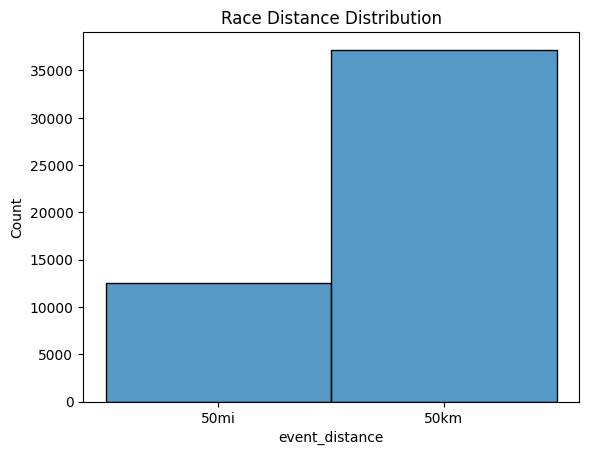

In [152]:
sns.histplot(df['event_distance'])
plt.title('Race Distance Distribution')
plt.show()

### How does race distance participation vary by gender?  

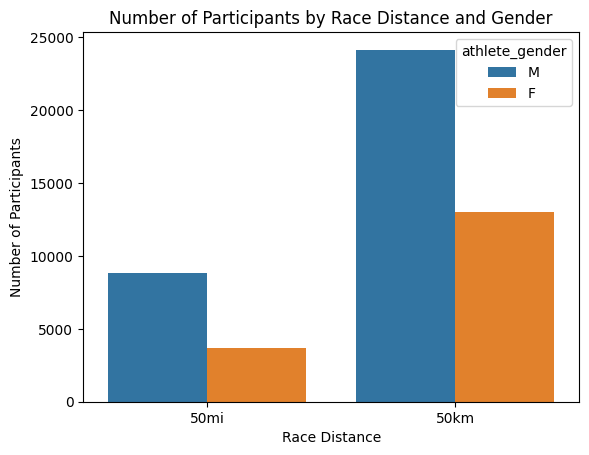

In [153]:
#Race Distances by Gender Distribution
sns.countplot(data=df, x='event_distance', hue='athlete_gender')
plt.title('Number of Participants by Race Distance and Gender')
plt.xlabel('Race Distance')
plt.ylabel('Number of Participants')
plt.show()

#### What is the distribution of athletes’ average speeds?  

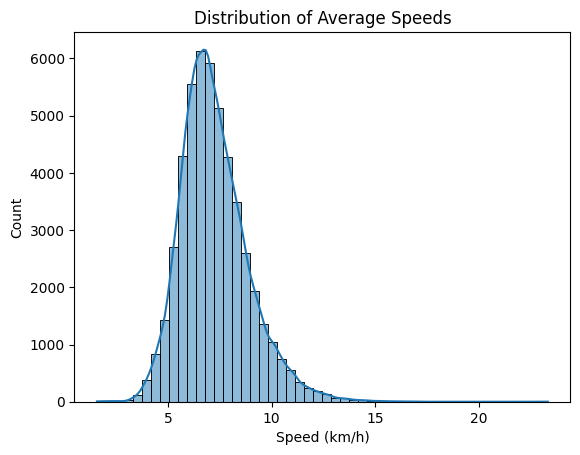

In [154]:
# Distribution of average speeds
sns.histplot(data=df, x='athlete_average_speed',bins=50, kde=True)

plt.title('Distribution of Average Speeds')
plt.xlabel('Speed (km/h)')
plt.ylabel('Count')

plt.show()

#### How does speed vary by race distance and gender?  

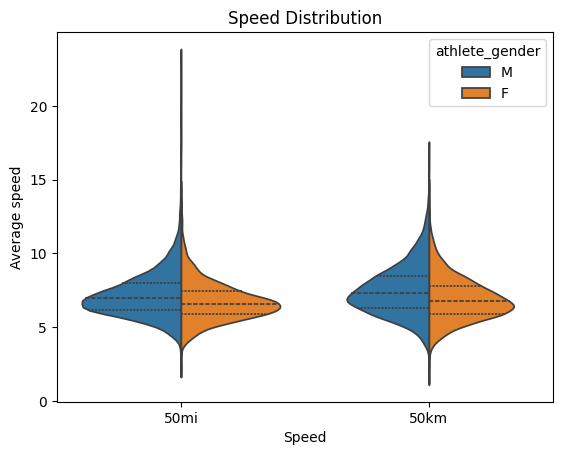

In [155]:
#Speed Distribution by Race Distance and Gender

sns.violinplot(data=df, x='event_distance', y='athlete_average_speed', hue='athlete_gender', split=True, inner='quartile')

plt.title('Speed Distribution')
plt.xlabel('Speed')
plt.ylabel('Average speed')
plt.show()

#### Does age affect running speed?  
 *Investigating whether younger or older runners tend to have higher speeds.*  

<Figure size 800x500 with 0 Axes>

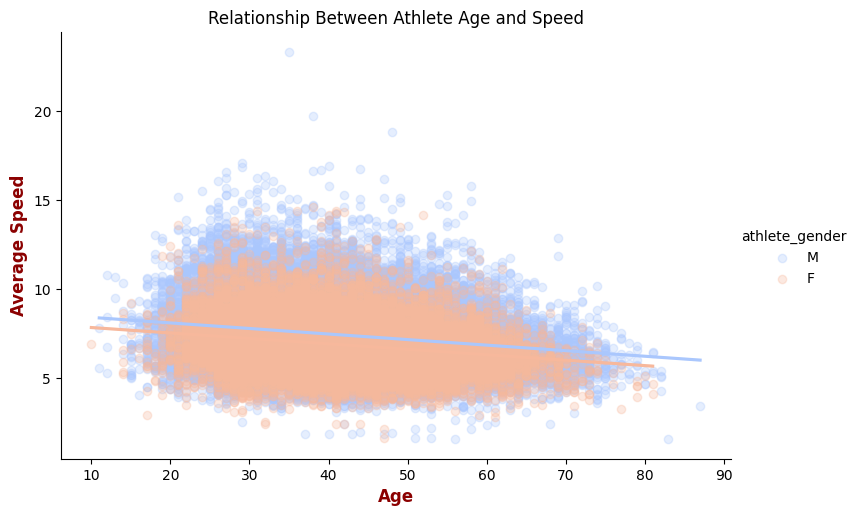

In [156]:
plt.figure(figsize=(8, 5))
sns.lmplot(data=df, x='athlete_age', y='athlete_average_speed', hue='athlete_gender', scatter_kws={'alpha':0.3}, aspect=1.5, palette="coolwarm")

plt.title('Relationship Between Athlete Age and Speed')
plt.xlabel('Age', fontsize=12, fontweight='bold', color='darkred')
plt.ylabel('Average Speed', fontsize=12, fontweight='bold', color='darkred')
plt.show()


#### Speed Distribution by Age Group and Gender
This boxplot visualizes how average speed varies across different age groups for male and female athletes. By grouping athletes into age ranges...

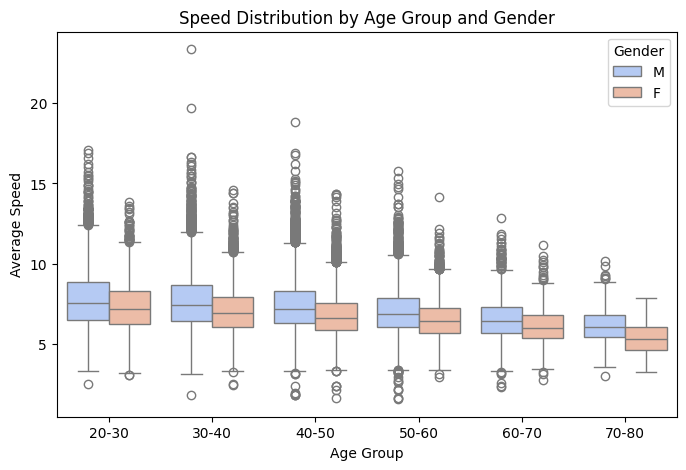

In [166]:
df["age_group"] = pd.cut(df["athlete_age"],
                         bins=[20, 30, 40, 50, 60, 70, 80],
                         labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"],
                         right=False)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="age_group", y="athlete_average_speed", hue="athlete_gender", palette="coolwarm")

plt.title("Speed Distribution by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Speed")
plt.legend(title="Gender")
plt.show()


It is clear that from the Boxplot:
- Younger runners tend to be slightly faster – Median speed is highest in the 20-30 and 30-40 age groups.
- Speed gradually declines with age.
- Men generally have higher median speeds than women in all age groups.
- Outliers exist across all groups, indicating that some older runners can still maintain high speeds. 

#### Who are the top 10 fastest ultra runners?  
 *Identifying the best performing athletes based on speed.*  


In [157]:
# top 10 fastest runners
fastest_runners = df.nlargest(10, 'athlete_average_speed')
fastest_runners

,year_of_event,event_dates,event_name,event_distance,event_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,athlete_performance_in_hours
6418,2022,2022-01-08,Wild Azalea 50 Mile Trail Challenge,50mi,25,3:26:48,M,23.346,841184,35,3.45
6419,2022,2022-01-08,Wild Azalea 50 Mile Trail Challenge,50mi,25,4:04:59,M,19.708,242018,38,4.08
6420,2022,2022-01-08,Wild Azalea 50 Mile Trail Challenge,50mi,25,4:16:30,M,18.823,954274,48,4.28
34808,2022,2022-10-08,Ruth Anderson Ultra 50km,50km,54,2:55:20,M,17.110,1019313,29,2.92
6830,2022,2022-04-23,Mad City 50K Road Race,50km,31,2:57:36,M,16.892,848704,40,2.96
41141,2022,2022-12-10,Tallahassee Ultra Distance Classic 50K,50km,22,2:57:48,M,16.873,674196,29,2.96
14176,2022,2022-03-19,Labor of Love 50 Mile Race,50mi,16,4:48:25,M,16.740,893921,44,4.81
6421,2022,2022-01-08,Wild Azalea 50 Mile Trail Challenge,50mi,25,4:49:33,M,16.674,954275,39,4.83
6422,2022,2022-01-08,Wild Azalea 50 Mile Trail Challenge,50mi,25,4:50:13,M,16.636,655793,38,4.84
1084,2022,2022-02-27,Caumsett Park 50K Lloyd Neck - Championships,50km,40,3:01:02,M,16.572,949616,27,3.02


#### What is the seasonal distribution of ultra marathons?  
  


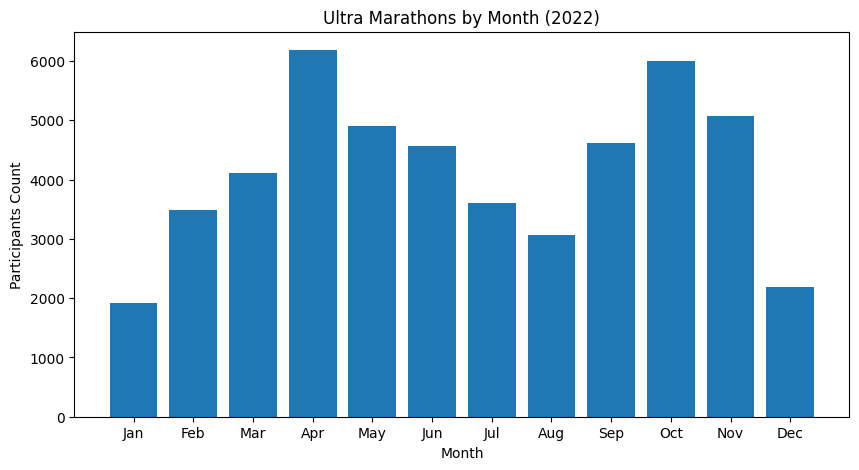

In [158]:
# monthly distribution by participants count
plt.figure(figsize=(10, 5))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

participants_count = df['event_dates'].dt.month.value_counts().sort_index()
plt.bar(month_names, participants_count)

plt.title('Ultra Marathons by Month (2022)')
plt.xlabel('Month')
plt.ylabel('Participants Count')

plt.show()

#### What is the seasonal distribution of ultra marathons?  

In [159]:
# Seasonal distribution of events
df['season'] = df['event_dates'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
df['season'].value_counts()

season
Fall      15699
Spring    15195
Summer    11239
Winter     7598
Name: count, dtype: int64

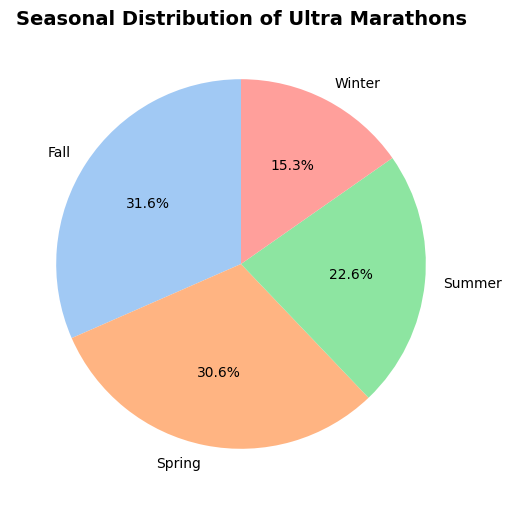

In [160]:
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")
df['season'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Seasonal Distribution of Ultra Marathons', fontsize=14, fontweight='bold')
plt.ylabel('')  # hiding ylabel
plt.show()
